1. Chargez votre jeu de données. 

In [96]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans 
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
data=pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [97]:
for i in data[['CREDIT_LIMIT','MINIMUM_PAYMENTS']]:
    data[i]=data[i].fillna(data[i].mean())

In [98]:
data=data.drop('CUST_ID',axis=1)

In [99]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


2. Utilisez le clustering hiérarchique pour identifier les regroupements inhérents au sein de vos données.

In [100]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data) 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [101]:
agglomerative=pd.DataFrame(clust_labels)

3. Tracez les clusters. 

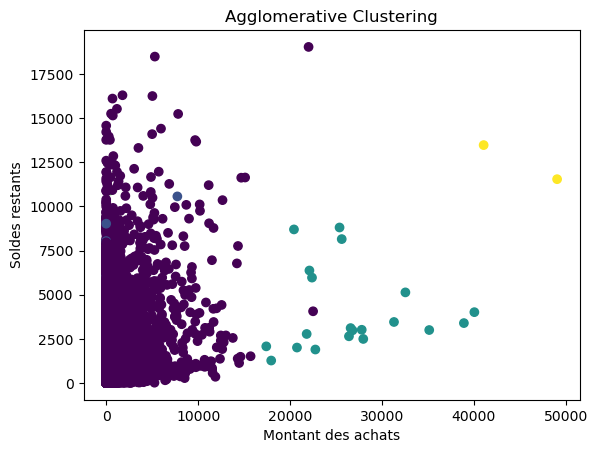

In [132]:
plt.scatter (data['PURCHASES'] , data["BALANCE"] , c= agglomerative)
plt.title("Agglomerative Clustering")
plt.xlabel("Montant des achats")
plt.ylabel("Soldes restants")
plt.show()

4. Tracez le dendrogramme.

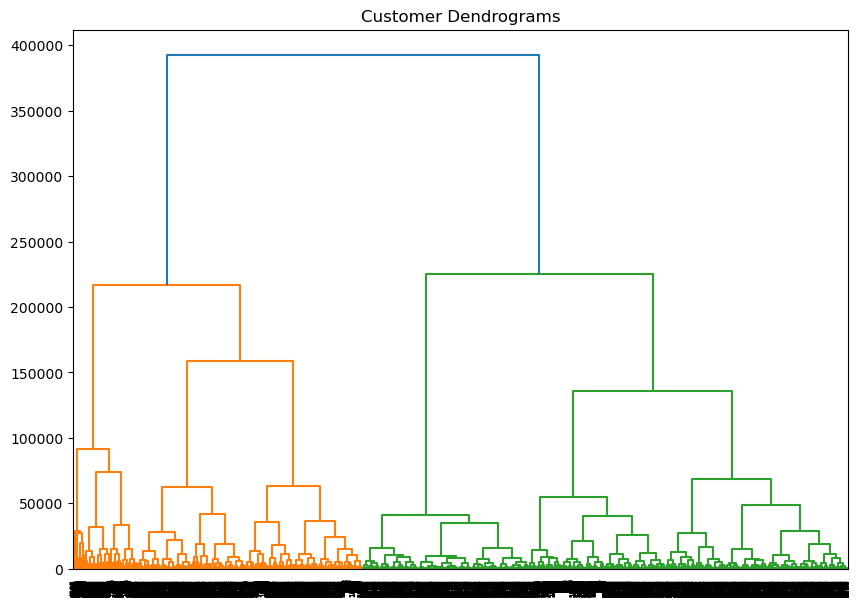

In [108]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data2, method="ward"))

Utilisez le clustering K-means. 

In [109]:
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

5. Essayez différentes valeurs K et sélectionnez la meilleure. 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

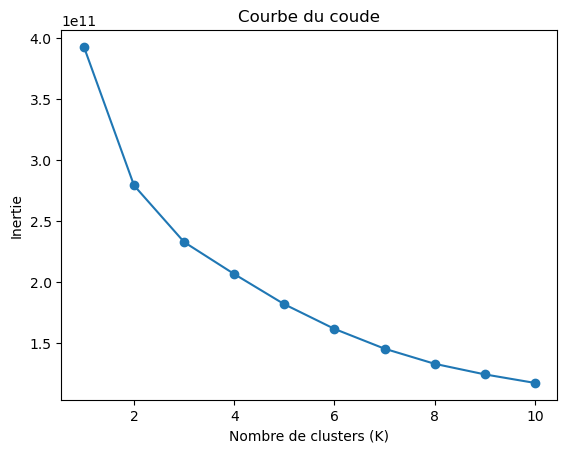

In [119]:
liste=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=40)
    kmeans.fit(data)
    liste.append(kmeans.inertia_)
plt.plot(range(1, 11), liste, marker='o')
plt.title('Courbe du coude')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.show()

In [134]:
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [135]:
labels=pd.DataFrame(kmeans.labels_)

6. Tracez les clusters. 

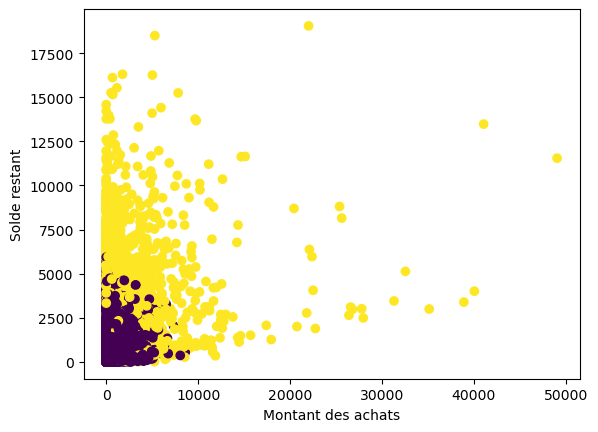

In [136]:
plt.scatter(data['PURCHASES'],data['BALANCE'], c=labels)
plt.xlabel('Montant des achats')
plt.ylabel('Solde restant')
plt.show()

7. Comparez les deux résultats. 

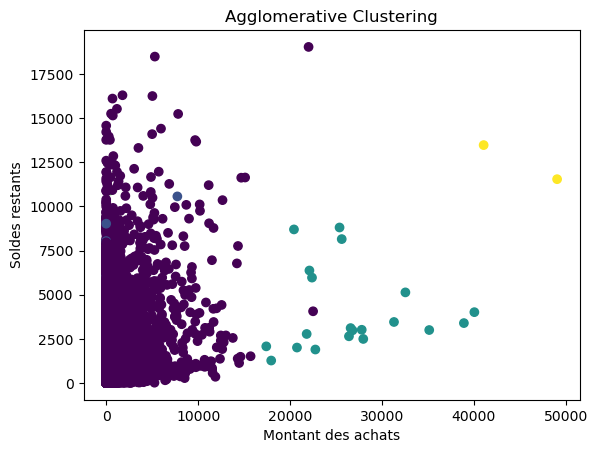

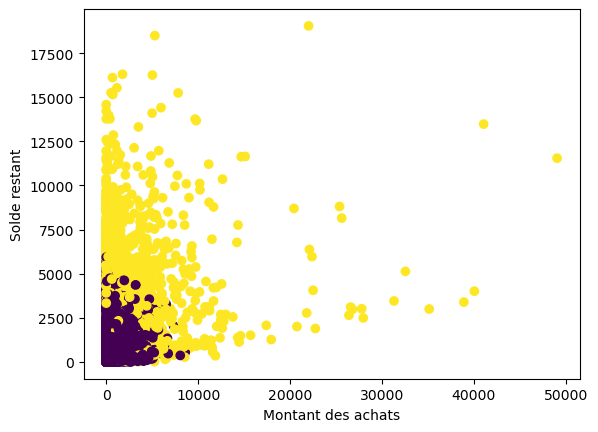

In [137]:
plt.scatter (data['PURCHASES'] , data["BALANCE"] , c= agglomerative)
plt.title("Agglomerative Clustering")
plt.xlabel("Montant des achats")
plt.ylabel("Soldes restants")
plt.show()
plt.scatter(data['PURCHASES'],data['BALANCE'], c=labels)
plt.xlabel('Montant des achats')
plt.ylabel('Solde restant')
plt.show()